# **Modern Theory of Detection and Estimation**
## **Lab 2. Machine Learning for Classification**
### **Fall 2023**

Bachelor's Degree in:
*   Mobile and Space Communications Engineering (group 61 and 65).
*   Sound and Image Engineering (group 66 and 69).
*   Telecomunication Technologies Engineering (groups 91, 92 and 95).
*   Telematic Engineering (group 71 and 79).

Signal Theory and Communications Department.
## **Students information**

**Surname(s) and name(s):** Pablo Fernández Martín

**Group:** 91

# **Logistics**


**Setup Instructions**

You will need the file found at Aula Global (in the master group). Please download the file over to your own private folder. Navigate to the folder where you copied the file to, and the folder should contain "Lab_classification_student_23_24.ipynb". Open Google Colab and upload the notebook. Sometimes it will take a minute or so for a new Jupyter server to start up on your behalf. Once it does, you are ready to start!

In the notebook, you will clearly see where you need to add code or write an answer for the different questions.

## **Objective**

As we learnt in the master class, the goal of a classification problem is to assign a class or category to every instance or sample of a data collection.

Here, we will assume that:

*   Every sample ${\bf x}$ is an $N$-dimensional vector in $\mathcal{R}^N$, where $N$ is the number of features.
*   The class $y$ of sample ${\bf x}$ is an element of a binary set $\{0,1\}$.

Then, the goal of a classifier is to predict the true value of $y$ after observing ${\bf x}$.

We will denote as $\hat{y}$ the classifier output or decision. If $y=\hat{y}$, the decision is a **hit**; otherwise, it is an **error**.

In this notebook, you will learn how to solve a **binary classification problem** in practice. First of all, it is necessary to decide which dataset will be used in the experiments. For this purpose, [**Breast Cancer Wisconsin (Original)**](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)
is the dataset that will be employed throughout this laboratory assignment. This dataset provides us with some features that are computed from a digitized image of a fine needle aspirate of a breast mass. They describe characteristics of the cell nuclei present in the image. The **goal** here is to develop a model to **classify** whether **this set of readings from clinical reports** are positive for breast cancer or not. This is one of the easier datasets to process since all the features have integer values.

We will use the [scikit-learn](https://scikit-learn.org/stable/) algorithms to process this dataset. After this, we can decide whether the features extracted from the mass of cells of the digitized image may correspond to a bening tumor or to a malignant tumor.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix
import numpy as np

In [ ]:
# Figures plotted inside the notebook
%matplotlib inline
# High quality figures
%config InlineBackend.figure_format = 'retina'


warnings.filterwarnings("ignore")

# <font color = 'black'> 1. Breast Cancer Wisconsin (Diagnostic) Dataset </font>

## 1.1 Description

The dataset used in this assignment was obtained by imaging a needle-tip-wide breast mass with biosip by Dr. William Wolberg, an employee of Wisconsin Hospital (Madison, USA) and digitizing these images by William Nick Street, one of the researchers of the University of Wisconsin Computer Sciences Department, in November 1995.

Below, it is shown a comparison between $2$ images: **bening** (top) and **malignant tumor cells** (below). These images that make up our dataset are the originals.

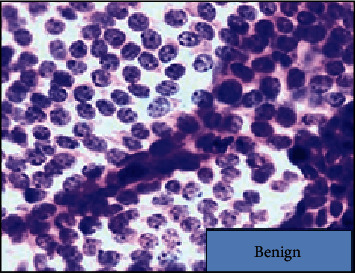




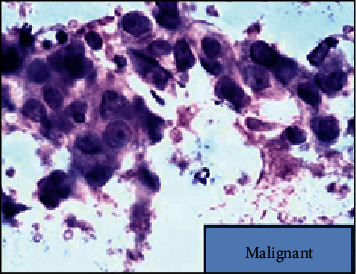

The dataset consists of a total of 569 samples. There are $30$ are features that contain various information about the cells.

The class label of the samples can be malignant (M $-$ class $0$) or benign (B $-$ class $1$).


Next, **various features of this dataset** are given together with their original form.

*   **Radius**: Radius of all cells are shown by the mean, standard deviation and worst value.
*   **Texture**: The mean, standard deviation and worst value of the grayscale change rates of interior surfaces are shown.
*   **Perimeter**: The perimeters of the cells were measured for the mean, standard deviation and worst value.
*   **Area**: The mean, standard deviation and worst-case value of the surface areas of the cells are all calculated and displayed
*   **SVMothness**: The average, standard deviation and worst value of the radius lengths of neighbouring cells are all displayed in the graph.
*   **Compactness**. It is computed as $\text{density} = \frac{\text{perimeter}^2}{\text{area}}$. The mean, standard deviation and worst value are shown.
*   **Concavity**: The mean, standard deviation and worst value of the indentations and protrusions around the cell are all displayed on this graph.
*   **Concave points**: The mean, standard deviation and worst value for the number of indentation and protrusion sites around the cell are all calculated using this data.
*   **Symmetry**: The mean, standard deviation and worst value of the change in ellipse shape of cells were calculated.
*   **Fractal dimension**: There are three values for this ratio: the mean, standard deviation, and worst value. There are three values for this ratio.




## 1.2 Getting the dataset

The first step in this assignment is to download the dataset we are going to work with. For this purpose, just execute the next code cell to obtain `X` and `y`.

Please note that `X` and `y` are jargon terms in machine learning. `X` are the variables we will use to classify the `y` variable. For each sample, there can be many variables in `X`, but there will only be one variable in the `y` set.


In [12]:

X,y = load_breast_cancer(return_X_y=True)

## 1.3 Dataset analysis

Let's check how many samples and features/attributes the dataset is composed of. We'll also inspect the  number of samples per category in the target variable.

How many samples are there in the dataset? Print it out!

In [13]:
# YOUR CODE HERE
muestras= X.shape[0]
print( 'Muestras totales' , muestras)

Muestras totales 569


What is the number of features per sample? Print it out!

In [14]:
# YOUR CODE HERE
caracteristicas = X.shape[1]
print ('Caracteristicas totales', caracteristicas)

Caracteristicas totales 30


Let's see now the class distribution. What is the number of samples belonging to malignant tumors? And to bening tumors?


In [15]:
# YOUR CODE HERE
# HINT: You can use the method ".count_nonzero" of Numpy library.


B = np.count_nonzero(y)
print ('Tumores benignos', B)
M = muestras - B
print ('Tumores malignos', M)

Tumores benignos 357
Tumores malignos 212


Plot a bar chart that represents the distribution of classes in the dataset (the number of samples whose actual class is $0$ and the number of samples whose actual class is $1$).

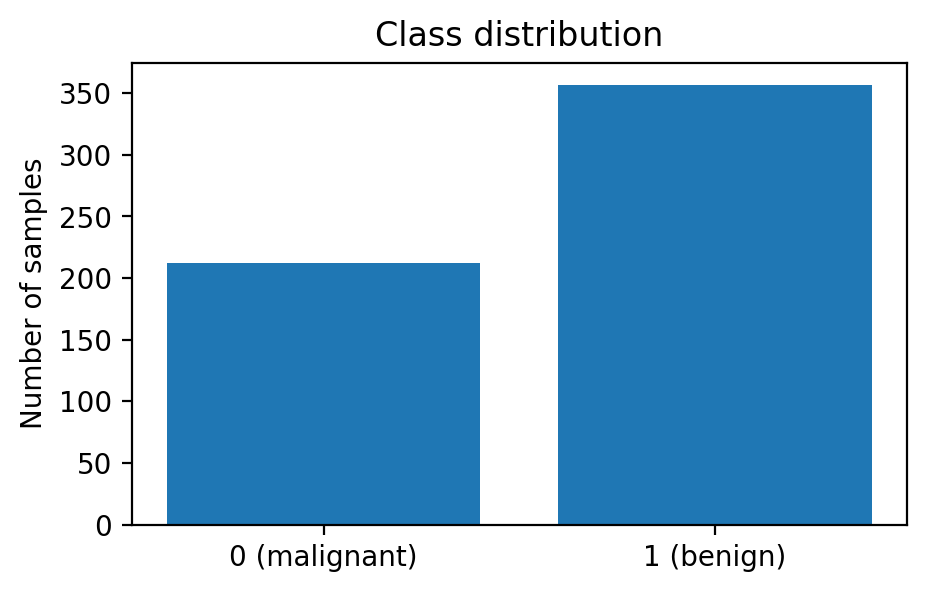

In [16]:
# Plot class distribution (0=malignant, 1=benign)

counts = {0: int(np.sum(y == 0)), 1: int(np.sum(y == 1))}

plt.figure(figsize=(5, 3))
plt.bar(["0 (malignant)", "1 (benign)"], [counts[0], counts[1]])
plt.ylabel("Number of samples")
plt.title("Class distribution")
plt.show()


## 1.4 Separation in training and test set

As it was explained in the previous laboratory assignment, splitting the dataset is essential for an unbiased evaluation of prediction performance. In most cases, it is enough to split the dataset randomly into two subsets:
*   The **training set** is applied to train, or **fit**, the model. For example, it can be used to find the optimal weights (coefficients) for linear regression, logistic regression, etc.
*   The **test set** is needed for an unbiased evaluation of the final model. It should not be used for fitting or validation tasks.

The sklearn function [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) can do this work for you!

**Note:** When comparing machine learning algorithms, it is desirable that they are fit and evaluated on the same subsets of the dataset. This can be achieved by fixing the seed for the pseudo-random number generator used when splitting the dataset. In the [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function, this can be reached by setting the `random_state` to a specific integer value.

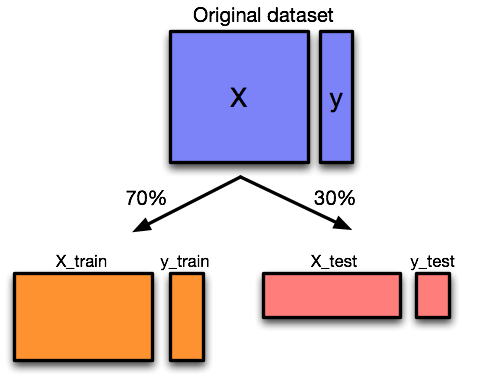

Split your **data** into **training** and **testing** (70/30) is indeed a good starting point!

For simplicity, use the names `X_train`, `X_test`, `y_train`, and `y_test` for the corresponding Numpy arrays.

$\underline{\text{Note}}$: In order to work with the same dataset as your colleagues, please use `random_state = 42` as the seed to split your data.

In [17]:
X_train, X_test, y_train, y_test =  train_test_split (X, y, test_size = 0.3, random_state = 42)

How many samples are there in training and test subsets, respectively?

In [18]:
#YOUR CODE HERE
muestras_train = X_train.shape[0]
muestras_test = X_test.shape[0]
print( 'Muestras totales train' , muestras_train)
print( 'Muestras totales test' , muestras_test)

Muestras totales train 398
Muestras totales test 171


Please, check that the total number of samples is $569$!

In [19]:
#YOUR CODE HERE
print('Muestras:', X_train.shape[0] + X_test.shape[0])

Muestras: 569


At this moment, there are available $2$ subsets for implementing the classification models:
*   `[X_train, y_train]`
*   `[X_test, y_test]`

## 1.5 Standardization of features
The ranges of variation of the variables conforming to the observations can be very different. Therefore, a typical pre-processing operation consists of *normalizing* the input variables so that they have comparable ranges.

Perhaps the most used scaling technique within the machine learning community is the standardization. This is a linear transformation that leaves each variable with 0 mean and unit variance. In short, the idea is to transform every variable in every observation by subtracting its mean and dividing by its standard deviation, i.e. if $X$ is one-dimensional, then $X_{\text{s}} = \frac{X - E[X]}{\sqrt{E[X^2]- E[X]^2}}$. If $\mathbf{x}$ is a feature vector, standardization assumes that its values fit a Normal distribution with a well-behaved mean and standard deviation.


The model [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) of `Scikit-learn` can perform this job for you!

For this purpose, perform the following operations:
*  Create an instance of `StandardScaler`.
*  Fit the scaler with the training data (`X_train`).
*  Create three new matrices:
    - `X_train_s`: It contains the result of transforming `X_train` with the scaler.
    - `X_test_s`: It contains the result of transforming `X_test` with the scaler.


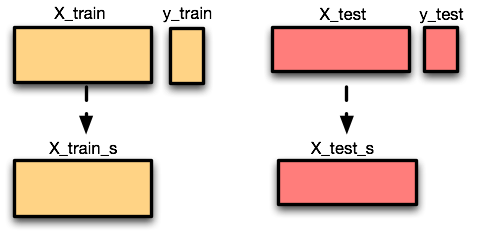

In [20]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)   


In [21]:
#Let's check out that everything is ok!
print('TRAINING SET')
print('Mean of each feature: ', np.round(np.mean(X_train_s,0),2))
print('Std of each feature: ', np.round(np.std(X_train_s,0),2))

print('\nTEST SET')
print('Mean of each feature: ', np.round(np.mean(X_test_s,0),2))
print('Std of each feature: ', np.round(np.std(X_test_s,0),2))

TRAINING SET
Mean of each feature:  [-0. -0. -0.  0. -0.  0.  0.  0. -0.  0.  0. -0. -0. -0. -0. -0. -0.  0.
 -0. -0.  0.  0. -0. -0. -0. -0. -0.  0.  0. -0.]
Std of each feature:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]

TEST SET
Mean of each feature:  [-0.05  0.1  -0.04 -0.05  0.1   0.07  0.03  0.04  0.11  0.06  0.    0.08
 -0.01 -0.02 -0.01  0.02 -0.04 -0.07  0.07  0.01 -0.01  0.1  -0.01 -0.01
  0.09  0.12  0.06  0.04  0.09  0.08]
Std of each feature:  [0.99 1.06 1.   0.93 1.07 1.1  1.08 1.09 1.06 0.91 0.84 1.19 0.85 0.75
 0.88 0.98 1.02 0.97 1.1  1.   1.02 1.07 1.05 0.99 0.97 1.18 1.2  1.09
 0.97 1.1 ]


# 2. Modeling

Once we have our data ready, let us analyze the performance obtained with different classifiers. In particular, we will experiment with the following **parametric classifiers**:

*   Linear Discriminant Analysis (LDA)
*   Logistic Regression (LR)

and the **non-parametric classifiers**:

*   $k$-Nearest Neighbors ($k$-NN)
*   Decision Tree (DT)
*   Random Forest (RF)

## 2.1 Classification evaluation metric

**Accuracy rate** summarizes the performance of a classification model as the number of correct predictions divided by the total number of predictions and can be used for both multiclass and binary classificaiton problems.

It is easy to calculate and intuitive to understand, making it the most common metric used for evaluating classifier models.
$$ $$
$$
\text{accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}
$$
$$ $$
 This intuition breaks down when the distribution of examples to classes is severely skewed (out of the scope of this assignment).

## 2.2 Hyperparameter selection via cross-validation


The performance of most of the machine learning algorithms depends strongly on the selected values for the hyperparameters.

If you remember from the previous laboratory assignment, the original dataset was divided into three subsets: **train, test, and validation**, while in this assignment, the dataset has been divided into two subsets: **train and test**. The basically idea behind this is that in the former assignment, we carried out an approximation of the common way of finding values for these hyperparameters: **cross validation**.

Cross validation is a commonly used procedure in machine learning to simulate the effect of training a model with a set of data and evaluate its generalization capabilities as the performance in a **separate dataset**.

  The cross validation process involves the following steps:

  - Randomly partition the training dataset in $N$ disjoint subsets of similar sizes. Each of this subset is called **fold** in machine learning terminology. Hence, the term **$N$-fold cross validation**.

  - Let's suppose we have chosen $N=3$ folds. This means the training data $(X_{\text{train}}, Y_{\text{train}})$ has been split in three subsets: $(X_1, Y_1)$, $(X_2, Y_2)$ and $(X_3, Y_3)$, so that $(X_1, Y_1) \cup (X_2, Y_2) \cup (X_3, Y_3) = (X_{\text{train}}, Y_{\text{train}})$.

  - Create an instance of the model with the corresponding hyperparameters. The cross validation follows with the execution of the following loop:

      For $n=1,2,\dots,N$ iterations:  
      1. Choose $(X_n,Y_n)$ as **validation set** for iteration $n$.
      2. Prepare a **training set** for iteration $n$ joining the rest of the subsets (excluding the validation set).
      3. Fit the model instance with the training set of step 2.
      4. Evaluate  the model instance (method `.score`) with the validation set of step 1.
      5. Keep the *score* achieved in the $n$ iteration.

  - Once the loop is finished, we have $N$ scores, each corresponding to the evaluation of the model fitted in each iteration with the corresponding validation set.
  - Estimate the **real score** that an instance of the model fitted using all the data would yield in a separate dataset computing the **mean** and **standard deviation** of the $N$ validation scores.

  Typical values for the number of folds include $N\in \{3, 5, 10\}$. For the results obtained in this assignment, use the default $5$-fold cross validation.

The question here is: How is the process of cross-validation carried out in this assignment? The answer to this question is by using the class [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). This class carries out an exhaustive search over specified parameter values for an estimator (or classifier). Aiming at understing how it works, it is necessary to briefly explain some concetps:

*   **Grids of hyperparameters**:

      This method consists in to form a **grid** with a number of dimensions equal to the number of hyperparameters that need to be optimized. The size of each dimension of the grid is equal to the number of values in the range of the corresponding hyperparameter. Notice that this method explores **discrete** ranges for each hyperparameter.

      In models that depend on a larger number of hyperparameters, it is necessary to be careful with the granularity of the ranges as the combinatorial explosion of the size of the grid can be hard to manage.


*   **Cross-validation to explore the grid**:

  The grid is explored by a loop that visits all its nodes that runs a cross validation. The process details are the following:

  For each node of the grid:  
  1. Create an instance of the model with the hyperparameters set to the values that define that node of the grid.
  2. Run a **cross validation** to estimate the test performance that the model would yield if it were fitted using the values for hyperparameter that correspond to that node.
  3. Store the cross validation score for that node of the grid.

  Once all the nodes of the grid have been cross validated, the procedure outputs the combination of hyperparameters that achieved the best performance in cross validation.



Before using `GridSearchCV`, let's have a look at the most important parameters it includes:

*   `estimator`: The model on which we want to use `GridSearchCV`. For instance, a classifier such as `sklearn.neighbors.KNeighborsClassifier`.
*   ``param_grid``: The parameter space is given as a dictionary with parameter names (`str`) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. This enables searching over any sequence of parameter settings.


* ``scoring``: Evaluation metric used to assess the performance of the cross-validated model on the test set.
 By default, the score function of the estimator is utilized, i.e., the `sklearn.metrics.accuracy_score` for classification and `sklearn.metrics.r2_score` for regression tasks.
*  ``cv``: Number of splits needed for cross-validation. By default, this parameter is set to $5$.

## 2.3 Designing the classification models (classifiers)

### 2.3.1 Linear Discriminant Analysis (LDA)

The class [LinearDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) included in `scikit-Learn` can do this work for you! In this case, it is not necessary hyperparameters tuning. We will train a LDA classifier with its default values.

**Your task here is:**

*   To train with standardized features a LDA model (with default hyperparameters).
*   Calculate the accuracy rate (in %) using both train and test sets and print out the results. Use the method `.score` for this purpose and round off the numbers to $2$ decimal places.


In [22]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train_s, y_train)

acc_train_lda = clf.score(X_train_s, y_train) * 100
acc_test_lda  = clf.score(X_test_s,  y_test)  * 100

print(f"LDA accuracy (train): {acc_train_lda:.2f}%")
print(f"LDA accuracy (test):  {acc_test_lda:.2f}%")


LDA accuracy (train): 96.48%
LDA accuracy (test):  95.32%


Having a look at the train accuracy, it is easy to observe that the problem is not linearly separable, but let us check it graphically (for the training set). The following code lines project each standardized training sample onto one axis (`n_components=1` in LDA model) and represent it (indicating its category or class).

Run the next code cell to see the result!



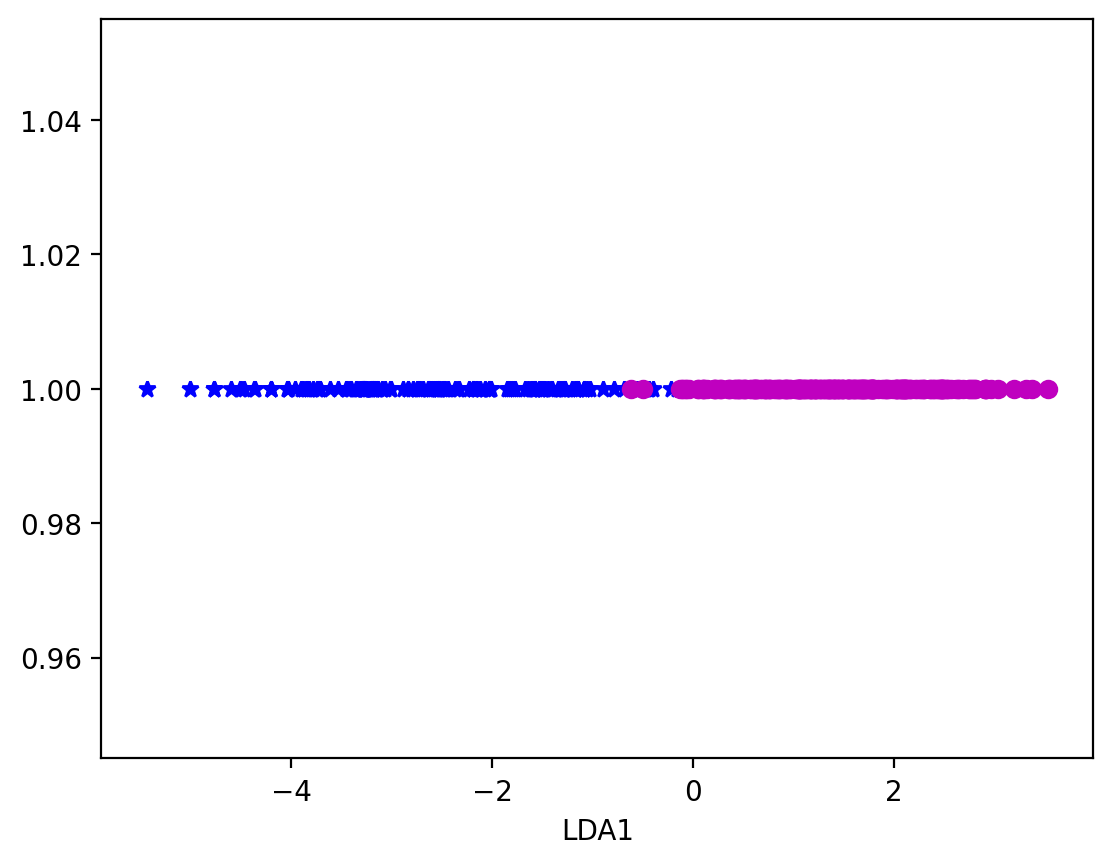

In [23]:
clf_LDA_1D = LinearDiscriminantAnalysis(n_components=1)
X_lda = clf_LDA_1D.fit_transform(X_train_s,y_train)
plt.xlabel('LDA1')
X_lda_clase_0 = X_lda[y_train==0,0]
X_lda_clase_1 = X_lda[y_train==1,0]

y0 = np.ones((X_lda_clase_0.shape[0],1))
y1 = np.ones((X_lda_clase_1.shape[0],1))

plt.plot(X_lda_clase_0,y0,'*b')
plt.plot(X_lda_clase_1,y1,'om')

plt.show()

### 2.3.2 Logistic regression

Aiming at implementing a logistic regressor classifier in Python, we will use the class [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)  included in `scikit-Learn`, which consists of a **regularized logistic regression**.

This means that, to the loss function of the logistic regressor explained in the master class, a penalty term (hyperparameter `penalty`) is added as follows:

*   **L1 regularization:** It adds an L1 penalty equal to the absolute value of the magnitude of coefficients. For example, Lasso regression model implements this method.
*   **L2 regularization:** It adds an L2 penalty which is equal to the square of the magnitude of coefficients. For example, Ridge or Kernel Ridge regression models implement this method. It is the default choice.

We can also choose to not apply any regularization by setting the parameter `penalty` to `none`.

The regularization strength  is controlled by the hyperparameter `C`. It is defined as the inverse of regularization strength and it must be a positive float. Smaller values specify stronger regularization. It can be seen as the inverse of the hypeparameter `alpha` in the classes `Lasso`, `Ridge` and `KernelRidge` included in `scikit-learn`.

**Tuning the hyperparameters**

This section is devoted to fine tuning the hyperparameters of the model. The hyperparameters that will be explored before fitting the logistic regressor in this assignment will be: the parameter `penalty` and the value of `C`.

> **Your task here is:**

*   To find the optimal values of `C` and `penalty`. For this purpose, the values that will be explored aiming at optimizing the performance of the classifier are shown below:
 - `C` $\in$ $[0.01,0.05, 0.1, 0.5, 1, 5, 10]$
 - `penalty` $\in$ {`L1`, `L2`}.

 Do a grid search to find out which are the best values for the aforementioned hyperparameters.
*   Once they have been obtained, use the attribute `best_estimator_` of `GridSearchCV` aiming at calculating the accuracy rate over the test set and print it out!  Please, round off the numbers to $2$ decimal places.

In [25]:
# Fine-tuning hyperparameters (Logistic Regression)


parameters = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

# liblinear supports both l1 and l2 penalties for binary classification
lr_base = LogisticRegression(solver="liblinear", max_iter=5000)

grid_LR = GridSearchCV(
    estimator=lr_base,
    param_grid=parameters,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_LR.fit(X_train_s, y_train)

print("Best params (LR):", grid_LR.best_params_)
print(f"Best CV accuracy (LR): {grid_LR.best_score_ * 100:.2f}%")


Best params (LR): {'C': 0.05, 'penalty': 'l2'}
Best CV accuracy (LR): 97.74%


Which are the most appropriate values of the  hyperparameters that you have obtained?

<font color = 'green'> YOUR ANSWER HERE

In [26]:
# Check the best model with the test set (Logistic Regression)
best_LR = grid_LR.best_estimator_

acc_train_lr = best_LR.score(X_train_s, y_train) * 100
acc_test_lr  = best_LR.score(X_test_s,  y_test)  * 100

print(f"Best LR accuracy (train): {acc_train_lr:.2f}%")
print(f"Best LR accuracy (test):  {acc_test_lr:.2f}%")


Best LR accuracy (train): 97.99%
Best LR accuracy (test):  98.83%


### 2.3.3  $k$-NN classifier

We will also explore the $k$-Nearest Neighbours ($k$-NN) algorithm by fine-tuning its two main hyperparameters:

*   `n_neighbors`: Number of neighbors to be used in the experiments (that is, the value of $k$).
*   `weights`: Weight function used in prediction. In this assignment, it can take two possible values:
  *   `uniform`: Uniform weights. All samples in each neighborhood are weighted equally.  It is the default choice.
  *   `distance`: Weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

The class [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)  included in `scikit-Learn` can do this work for you!

In [27]:
knn_default = KNeighborsClassifier()
knn_default.fit(X_train_s, y_train)

acc_train_knn_default = knn_default.score(X_train_s, y_train) * 100
acc_test_knn_default  = knn_default.score(X_test_s,  y_test)  * 100

print(f"kNN (default) accuracy (train): {acc_train_knn_default:.2f}%")
print(f"kNN (default) accuracy (test):  {acc_test_knn_default:.2f}%")


kNN (default) accuracy (train): 97.74%
kNN (default) accuracy (test):  95.91%


> **Your task here is:**

*   To find the appropiate value of `n_neighbors` (that is, the value of $k$) and `weights`. For this purpose, the values that will be explored aiming at optimizing the performance of the classifier are shown below:
 - `n_neighbors` $\in$ $[1, 2, 3,\ldots,9, 10]$
 - `weights` $\in$ {`uniform`, `distance`}

  Do a grid search to find out which are the best values for the aforementioned hyperparameters.
*   Once they have been obtained, use the attribute `best_estimator_` of `GridSearchCV` aiming at calculating the accuracy rate using the test set and print it out!  Please, round off the numbers to $2$ decimal places.

**Use standarized features** for this classification task.

In [35]:
# Fine-tuning hyperparameters (k-NN)


parameters = {
    "n_neighbors": list(range(1, 11)),   # 1..10
    "weights": ["uniform", "distance"]
}

knn_base = KNeighborsClassifier()

grid_KNN = GridSearchCV(
    estimator=knn_base,
    param_grid=parameters,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_KNN.fit(X_train_s, y_train)

print("Best params (kNN):", grid_KNN.best_params_)
print(f"Best CV accuracy (kNN): {grid_KNN.best_score_ * 100:.2f}%")


Best params (kNN): {'n_neighbors': 3, 'weights': 'uniform'}
Best CV accuracy (kNN): 95.98%


Which are the most appropriate values of the  hyperparameters that you have obtained?

<font color = 'green'> YOUR ANSWER HERE

In [36]:
# Check the best model with the test set (k-NN)
best_KNN = grid_KNN.best_estimator_

acc_train_knn = best_KNN.score(X_train_s, y_train) * 100
acc_test_knn  = best_KNN.score(X_test_s,  y_test)  * 100

print(f"Best kNN accuracy (train): {acc_train_knn:.2f}%")
print(f"Best kNN accuracy (test):  {acc_test_knn:.2f}%")


Best kNN accuracy (train): 98.74%
Best kNN accuracy (test):  95.91%


### 2.3.4 Study of Decision Trees

There are several hyperparemeters that could be adjusted before fitting a decision tree classifier. Having a look at [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), you can see that some of them are, for instance, the total number of terminal nodes in a tree (`max_leaf_nodes`), the minimum of samples for splitting a node (`min_samples_split`) or the minimum of samples per node (`min_samples_leaf`).

For the sake of simplicity, we will only focus on the depth of the tree. In the class [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) included in `scikit-learn`, this hyperparameter is called `max_depth`.

> **Your task here is:**

*   To find the appropiate value of `max_depth`. For this purpose, the values that will be explored aiming at optimizing the performance of the classifier are shown below:
 - `max_depth` $\in \{1,5,9,13,17,21,25,29,33,37\}$

  Do a grid search to find out which are the best values for the aforementioned hyperparameter.

*   Once they have been obtained, use the attribute `best_estimator_` of `GridSearchCV` aiming at calculating the accuracy rate using the test set and print it out!  Please, round off the numbers to $2$ decimal places.

**Use non-standarized features** for this classification task.

In [37]:


parameters = {
    "max_depth": [1, 5, 9, 13, 17, 21, 25, 29, 33, 37]
}

dt_base = DecisionTreeClassifier(random_state=42)

grid_DT = GridSearchCV(
    estimator=dt_base,
    param_grid=parameters,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_DT.fit(X_train, y_train)

print("Best max_depth (DT):", grid_DT.best_params_)
print(f"Best CV accuracy (DT): {grid_DT.best_score_ * 100:.2f}%")


Best max_depth (DT): {'max_depth': 5}
Best CV accuracy (DT): 92.47%


Which is the most appropiate value of `max_depth` that you have obtained?

<font color = 'green'> YOUR ANSWER HERE

In [38]:
# Check the best model with the test set (Decision Tree)
best_DT = grid_DT.best_estimator_

acc_train_dt = best_DT.score(X_train, y_train) * 100
acc_test_dt  = best_DT.score(X_test,  y_test)  * 100

print(f"Best DT accuracy (train): {acc_train_dt:.2f}%")
print(f"Best DT accuracy (test):  {acc_test_dt:.2f}%")


Best DT accuracy (train): 99.50%
Best DT accuracy (test):  95.32%


### 2.3.5 Study of Random Forest

There are several hyperparemeters that could be adjusted before fitting a random forest for classification. Since random forest is an ensemble of decision trees, having a look at [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), you can see that some of the hyperparameters are, for example, the total number of terminal nodes in a tree (`max_leaf_nodes`), the minimum of samples for splitting (`min_samples_split`) or the minimum of samples per node (`min_samples_leaf`) as in the class [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In this assignment, we will focus on the number of trees of the ensemble, along with the maximum depth of each tree in the ensemble. In the module [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) of `scikit-learn`, these hyperparameters are called `n_estimators` and `max_depth`, respectively.


> **Your task here is:**

*   To find the appropiate value of `n_estimators` and `max_depth`. For this purpose, the values that will be explored aiming at optimizing the performance of the classifier are shown below:
 - `n_estimators` $ \in \{10, 20, 50, 100, 150\}$
 - `max_depth` $\in \{5,10,15,20\}$

*   Once they have been obtained, use the attribute `best_estimator_` of `GridSearchCV` aiming at calculating the accuracy rate using the test set and print it out!  Please, round off the numbers to $2$ decimal places.

**Use non-standarized features** for this classification task.


In [39]:
# Fine-tuning hyperparameters (Random Forest)


parameters = {
    "n_estimators": [10, 20, 50, 100, 150],
    "max_depth": [5, 10, 15, 20]
}

rf_base = RandomForestClassifier(random_state=42)

grid_RF = GridSearchCV(
    estimator=rf_base,
    param_grid=parameters,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_RF.fit(X_train, y_train)

print("Best params (RF):", grid_RF.best_params_)
print(f"Best CV accuracy (RF): {grid_RF.best_score_ * 100:.2f}%")


Best params (RF): {'max_depth': 5, 'n_estimators': 150}
Best CV accuracy (RF): 95.22%


Which are the most appropriate values of the  hyperparameters that you have obtained?

<font color = 'green'> YOUR ANSWER HERE

In [40]:
# Check the best model with the test set (Random Forest)
best_RF = grid_RF.best_estimator_

acc_train_rf = best_RF.score(X_train, y_train) * 100
acc_test_rf  = best_RF.score(X_test,  y_test)  * 100

print(f"Best RF accuracy (train): {acc_train_rf:.2f}%")
print(f"Best RF accuracy (test):  {acc_test_rf:.2f}%")


Best RF accuracy (train): 99.25%
Best RF accuracy (test):  97.08%


# <font color = 'black'> 3. Best classification model </font>

It has always been said that we understand faster when we visualize data. In this section of the assignment, we will find out which classification model is the best fit for our data!

  > **Your task here is:**

  *  To represent, by making a bar plot, the accuracy rate (in %) obtained by each classification model evaluated in this assignment (with its best values for the hyperparameters) for the **test set**.




In [41]:
best_name = None
best_test_acc = -1.0

results = {
    "LDA (default)": (acc_train_lda, acc_test_lda),
    "LR (tuned)": (acc_train_lr, acc_test_lr),
    "kNN (tuned)": (acc_train_knn, acc_test_knn),
    "DT (tuned)": (acc_train_dt, acc_test_dt),
    "RF (tuned)": (acc_train_rf, acc_test_rf),
}

print("Accuracy summary (train/test):")
for name, (tr, te) in results.items():
    print(f"- {name:12s} -> train: {tr:6.2f}% | test: {te:6.2f}%")
    if te > best_test_acc:
        best_test_acc = te
        best_name = name

best_model_map = {
    "LDA (default)": clf,
    "LR (tuned)": best_LR,
    "kNN (tuned)": best_KNN,
    "DT (tuned)": best_DT,
    "RF (tuned)": best_RF,
}

best_model = best_model_map[best_name]
print("\nBest classifier (by TEST accuracy):", best_name)


Accuracy summary (train/test):
- LDA (default) -> train:  96.48% | test:  95.32%
- LR (tuned)   -> train:  97.99% | test:  98.83%
- kNN (tuned)  -> train:  98.74% | test:  95.91%
- DT (tuned)   -> train:  99.50% | test:  95.32%
- RF (tuned)   -> train:  99.25% | test:  97.08%

Best classifier (by TEST accuracy): LR (tuned)


Which classifier achieves the best accuracy rate?

<font color = 'green'> YOUR ANSWER HERE

# <font color = 'black'> 4. Other classification performance metrics </font>


In this last section of the assignment, other different metrics commonly used for binary classification problems will be explored.

*  1. In binary classification, the **confusion matrix** is a table that summarizes the performance of a classification model by comparing its predicted labels with the true labels. It displays the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) of the model's predictions.

    > **Your task here is:**
    * To compute the confusion matrix to evaluate the accuracy of the LR classifier  for the test set. You can use [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) to compute the confusion matrix and [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) to easily plot this matrix (both classes included in `scikit-learn`).




In [43]:
# Predict on the correct feature space
if best_name in ["LDA (default)", "LR (tuned)", "kNN (tuned)"]:
    y_pred = best_model.predict(X_test_s)
else:
    y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

TN, FP, FN, TP = cm.ravel()
print(f"\nTN={TN}, FP={FP}, FN={FN}, TP={TP}")

accuracy = (TP + TN) / (TP + TN + FP + FN)
p_fa = FP / (FP + TN) if (FP + TN) > 0 else 0.0      # false alarm
p_miss = FN / (FN + TP) if (FN + TP) > 0 else 0.0    # miss

print(f"\nAccuracy: {accuracy*100:.2f}%")
print(f"P_FA (false alarm): {p_fa*100:.2f}%")
print(f"P_MISS (miss): {p_miss*100:.2f}%")


Confusion matrix:
 [[ 62   1]
 [  1 107]]

TN=62, FP=1, FN=1, TP=107

Accuracy: 98.83%
P_FA (false alarm): 1.59%
P_MISS (miss): 0.93%


From the previous matrix, indicate the number of TP, TN, FP and FN samples.

<font color = 'green'> YOUR ANSWER HERE

How do you compute the accuracy rate, the probability of false alarm and the probability of miss from this matrix?

<font color = 'green'> YOUR ANSWER HERE

*  2. The **Receiver Operating Characteristic** (ROC) curve is a plot that illustrates the performance of a detector (binary classifier) by plotting its probability of detection ($P_{\text{D}}$) vs.
the probability of false alarm ($P_{\text{FA}}$) at various threshold settings. Furthermore, to obtain a performance metric similar to accuracy, it is possible to compute the Area Under the Curve (AUC) metric, which determines what is the total area under the ROC curve.

    There is a class available in `scikit-learn` to calculate the [ROC curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) and another one to calculate the [AUC metric](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html#sklearn.metrics.auc).

    > **Your task here is:**
    * To plot the ROC curve and calculate the AUC for the LR classifier.

  $\underline{\text{Hint}}$: Please note that the parameter `y_score` required in `roc_curve` represents the probability estimates of the positive class. In binary classification case, the method `predict_proba` returns probability estimates. In particular, it predicts the probabibility for a sample to be negative and positive, and the second column shows how much probability of this sample belongs to positive class. When passing only positive probability, ROC evaluates on different thresholds and checks if given probability $>$ threshold (say $0.5$), it belongs to positive class otherwise it belongs to negative class.



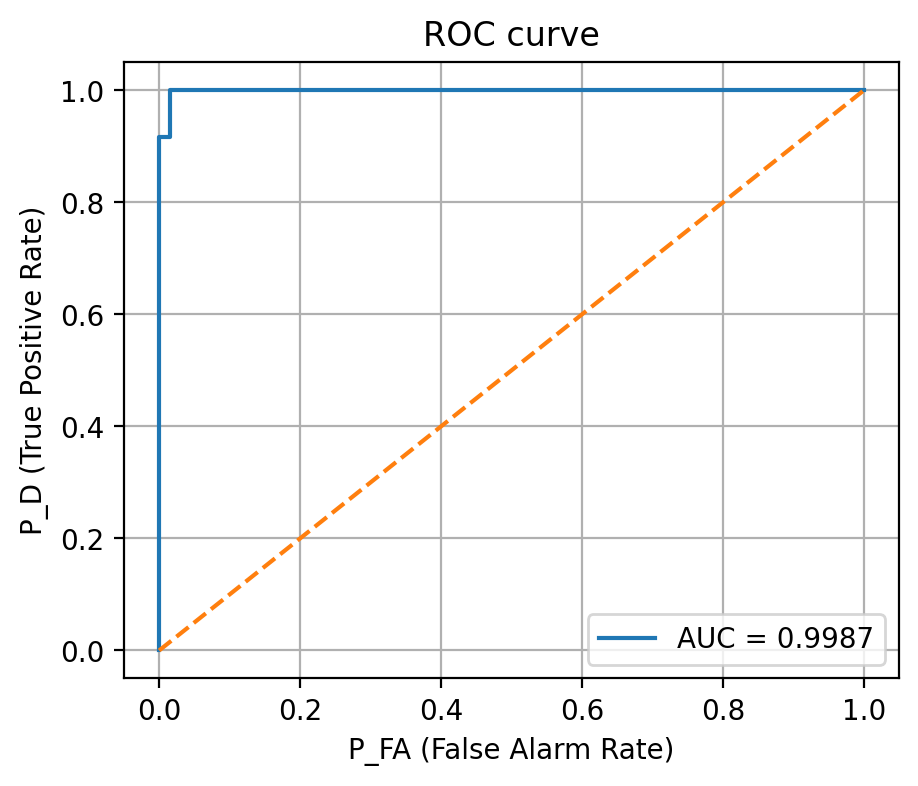

AUC: 0.9987


In [45]:
# Probability scores for the positive class (label 1)
if best_name in ["LDA (default)", "LR (tuned)", "kNN (tuned)"]:
    y_score = best_model.predict_proba(X_test_s)[:, 1]
else:
    y_score = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("P_FA (False Alarm Rate)")
plt.ylabel("P_D (True Positive Rate)")
plt.title("ROC curve")
plt.grid(True)
plt.legend()
plt.show()

print(f"AUC: {roc_auc:.4f}")

What is the value of AUC metric?

<font color = 'green'> YOUR ANSWER HERE